# terms
$\Lambda$ : Hyperparameter \
$\theta$ : Param of single distribution \
for eg $\mu$ : Mean of the distribution or $\sigma$ : variance of distribution \
$X$ : DATA \
$Z$: Evidence

For changing distribution of $\lambda$ https://docs.scipy.org/doc/scipy/reference/stats.html

Some helpful resources : https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html, https://docs.exoplanet.codes/en/latest/tutorials/intro-to-pymc3/, https://boyangzhao.github.io/posts/mcmc-bayesian-inference


Solving $ P(\Lambda|X,\mu)$ using Bayes th. 

$ P(\Lambda|X,\mu) =\frac{P(X,\mu|\Lambda)\pi(\Lambda)}{Z}=\frac{P(X|\mu,\Lambda)\pi(\mu|\Lambda)\pi(\Lambda)}{Z}$

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

# Case 1 : Estimating mean ($\Lambda$) of a Gaussian distribution

Text(0.5, 1.0, '$\\mathcal{N}(\\Lambda=3,1)$')

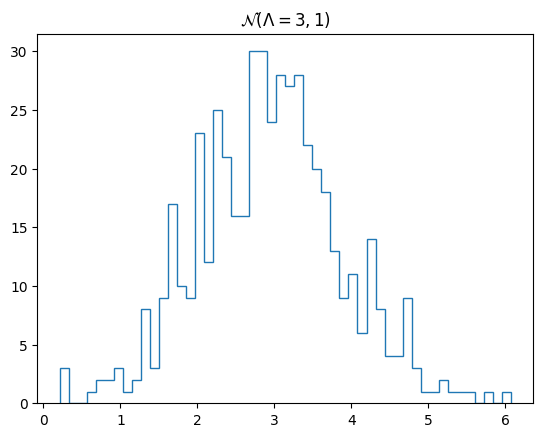

In [2]:
LEN_DATA = 500 # size of X
SIZE = 500 # number of points on the distribution
LAMBDA = 3 # mu here
DIST = st.norm(loc=LAMBDA, scale=1).rvs(size=SIZE) # hyperparameter is governed by a gaussian function

plt.hist(DIST, bins=50, fill=False, histtype='step')
plt.title(r'$\mathcal{N}(\Lambda=3,1)$')

In [3]:
X = np.empty((SIZE, LEN_DATA))
for i in range(SIZE):
    
    # Note here the std. dev of the X's is small. Large std. dev would lead
    # to incorrect estimation of "MU". For eg. std. dev of 1 would lead to 
    # MU ~ 1.5.
    
    X[i] = st.norm(loc=DIST[i], scale=0.5).rvs(size=LEN_DATA) 

Text(0, 0.5, '$X=\\mathcal{N}(\\mu,1)$')

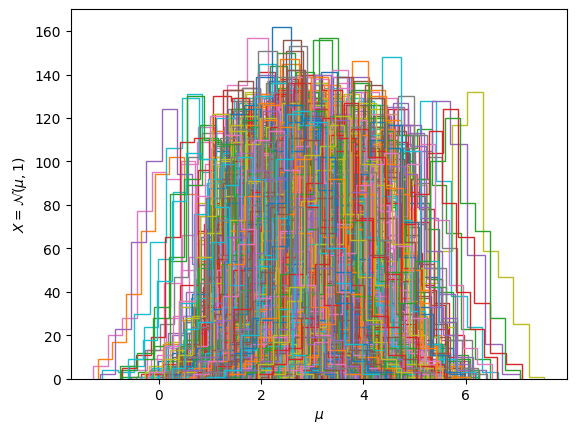

In [4]:
for i in range(SIZE):
    plt.hist(X[i], fill=False, histtype='step', label=i)
plt.xlabel('$\mu$')
plt.ylabel('$X=\mathcal{N}(\mu,0.5)$')

In [5]:
import pymc3 as pm

In [6]:
with pm.Model() as model:

    hyperprior = pm.Uniform('MU', lower=1, upper=5)  # hyperprior
    prior = pm.Normal('mu', mu=hyperprior, sigma=1)  # prior draws data points from hyperprior
    obs = pm.Normal('obs', mu=prior, sigma=0.5, observed=X)  # likelihood draws data points from prior
    step = pm.Metropolis()

    # sample with 3 independent Markov chains
    trace = pm.sample(draws=800, chains=5, step=step, return_inferencedata=True, cores=5)

Multiprocess sampling (5 chains in 5 jobs)
CompoundStep
>Metropolis: [mu]
>Metropolis: [MU]


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 5 chains for 1_000 tune and 800 draw iterations (5_000 + 4_000 draws total) took 2 seconds.
The number of effec

array([[<Axes: title={'center': 'MU'}>, <Axes: title={'center': 'MU'}>]],
      dtype=object)

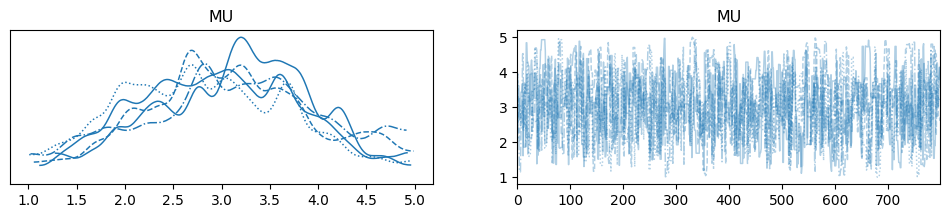

In [7]:
az.plot_trace(trace, var_names=('MU'))

In [8]:
az.summary(trace, var_names=["MU"])["mean"]

MU    3.022
Name: mean, dtype: float64

# Varying 2 parameters

Text(0.5, 1.0, '$\\mathcal{N}(\\lambda_1=2,\\lambda_2=0.5)$')

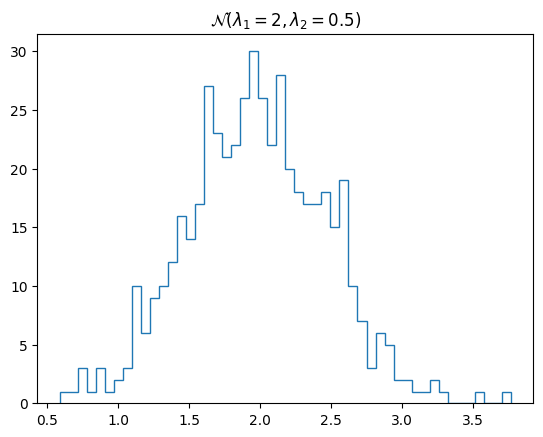

In [2]:
LEN_DATA = 500 # size of X
SIZE = 500 # mu in this case 
LAMBDA = [2,.5]
DIST = st.norm(loc=LAMBDA[0], scale=LAMBDA[1]).rvs(size=SIZE) 
plt.hist(DIST, bins=50, fill=False, histtype='step')
plt.title(r'$\mathcal{N}(\lambda_1=2,\lambda_2=0.5)$')

In [3]:
X = np.empty((SIZE, LEN_DATA))
for i in range(SIZE):
    X[i] = st.norm(loc=DIST[i], scale=0.5).rvs(size=LEN_DATA)

Text(0, 0.5, '$X=\\mathcal{N}(\\mu,0.5)$')

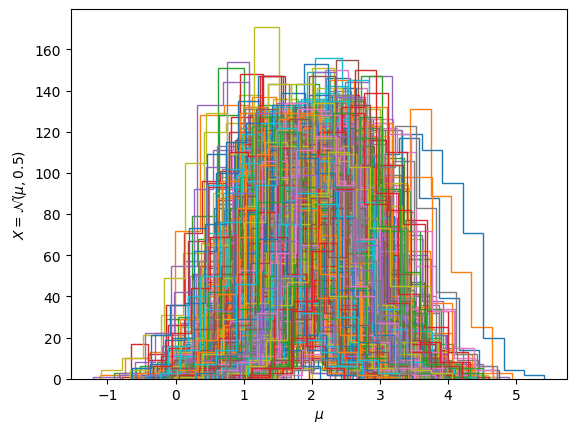

In [4]:
# large number of data sets can lead to a messy plot
for i in range(SIZE):
    plt.hist(X[i], fill=False, histtype='step', label=i)
plt.xlabel('$\mu$')
plt.ylabel('$X=\mathcal{N}(\mu,0.5)$')

In [5]:
import pymc3 as pm

In [6]:
with pm.Model() as model:

    MU = pm.Uniform('MU', lower=0, upper=5)
    SIGMA = pm.Uniform('SIGMA', lower=0, upper=1)
    hyperprior = pm.Normal('hP', mu=MU, sigma=SIGMA)  # hyperprior
    prior = pm.Normal('mu', mu=hyperprior, sigma=1)  # prior draws data points from hyperprior
    obs = pm.Normal('obs', mu=prior, sigma=0.5, observed=X)  # likelihood draws data points from prior
    step = pm.Metropolis()

    # sample with 3 independent Markov chains
    trace = pm.sample(draws=500, chains=10, step=step, return_inferencedata=True, cores=1)


Sequential sampling (10 chains in 1 job)
CompoundStep
>Metropolis: [mu]
>Metropolis: [hP]
>Metropolis: [SIGMA]
>Metropolis: [MU]


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 10 chains for 1_000 tune and 500 draw iterations (10_000 + 5_000 draws total) took 18 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<Axes: title={'center': 'MU'}>, <Axes: title={'center': 'MU'}>],
       [<Axes: title={'center': 'SIGMA'}>,
        <Axes: title={'center': 'SIGMA'}>]], dtype=object)

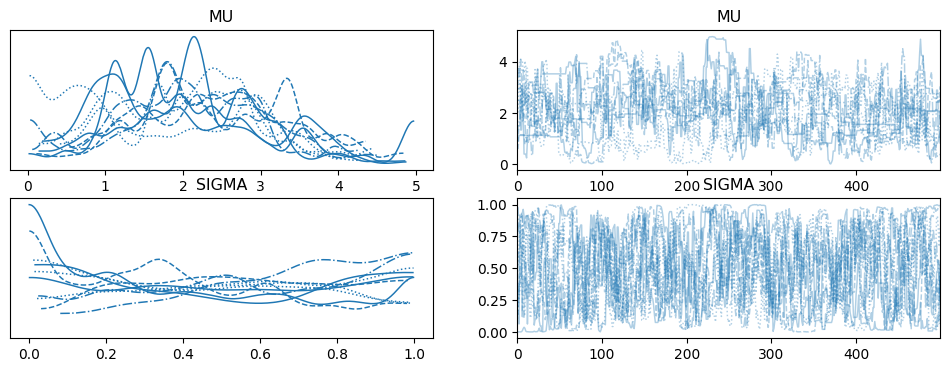

In [7]:
az.plot_trace(trace, var_names=('MU', 'SIGMA'))

In [8]:
az.summary(trace, var_names=["MU", "SIGMA"])["mean"]

MU       2.094
SIGMA    0.500
Name: mean, dtype: float64

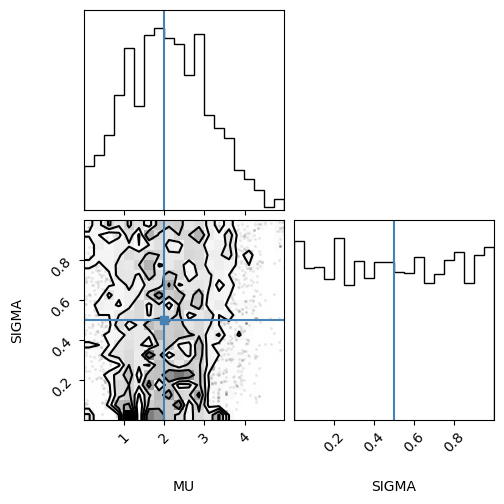

: 

In [9]:
import corner
_ = corner.corner(trace, var_names=["MU", "SIGMA"], truths=dict(MU=2, SIGMA=.5))